# Connect to WRDS and Obtain Dataset.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import wrds
db = wrds.Connection()

Loading library list...
Done


Determine <em>datasets</em> within the <b>MSCI ESG KLD STATS</b> library with the vendor name <b>kld</b>:

In [3]:
db.list_tables(library="kld")

['history', 'kldnames']

Get data column names

In [4]:
history = db.describe_table(library="kld", table="history")
history

Approximately 53168 rows in kld.history.


,name,nullable,type
0,companyname,True,VARCHAR(200)
1,cusip,True,VARCHAR(15)
2,ticker,True,VARCHAR(15)
3,companyid,True,VARCHAR(20)
4,env_str_a,True,DOUBLE PRECISION
...,...,...,...
163,pro_str_j,True,DOUBLE PRECISION
164,pro_str_k,True,DOUBLE PRECISION
165,year,True,DOUBLE PRECISION
166,pro_con_g,True,DOUBLE PRECISION


In [5]:
colName = history.name

Obtain full raw dataset.

In [6]:
# data = db.get_table(library='kld', table='history', columns=colName)
data = db.get_table(library='kld', table='history')
data

,companyname,cusip,ticker,companyid,env_str_a,env_str_b,env_str_c,env_str_d,env_str_f,env_str_x,...,pro_str_e,pro_str_f,pro_str_g,pro_str_h,pro_str_i,pro_str_j,pro_str_k,year,pro_con_g,domicile
0,"AuthenTec, Inc.",52660107,None,15927,0.0,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,None
1,Benihana Inc,82047200,None,10211,NaN,0.0,0.0,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,None
2,"MEDTOX Scientific, Inc.",58497720,None,16012,NaN,0.0,NaN,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,None
3,AKER SOLUTIONS ASA,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,NO
4,Capital Property Fund Ltd,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,ZA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53163,Sealy Corporation,81213930,ZZ,13186,0.0,0.0,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,NaN,None
53164,Sealy Corporation,81213930,ZZ,13186,0.0,0.0,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,None
53165,Hubbell Incorporated,None,huba,None,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992.0,NaN,None
53166,"NWNL Companies, Inc.",None,nwn,None,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992.0,NaN,None


In [7]:
data.sort_values(by=['ticker', 'year'])

,companyname,cusip,ticker,companyid,env_str_a,env_str_b,env_str_c,env_str_d,env_str_f,env_str_x,...,pro_str_e,pro_str_f,pro_str_g,pro_str_h,pro_str_i,pro_str_j,pro_str_k,year,pro_con_g,domicile
8,"Asia Pacific Telecom Co., Ltd.",TW000368,#N/A,None,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,1.0,NaN,NaN,2013.0,NaN,None
9,BRP Inc.,05577W20,#N/A,None,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2013.0,NaN,None
10,"CHINA CINDA ASSET MANAGEMENT CO., LTD",CNE10000,#N/A,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,None
11,"Iida Group Holdings Co., Ltd.",JP313109,#N/A,None,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,None
12,IOI Properties Group Bhd,MYL5249O,#N/A,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,AKER SOLUTIONS ASA,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,NO
4,Capital Property Fund Ltd,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,ZA
5,Intra-Cellular Therapies Inc,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,US
6,Intra-Cellular Therapies Inc,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,NaN,CA


# Examine Dataset

Full raw dataframe size:

In [8]:
data.shape

(53168, 168)

Number of unique company based on <i>companyname</i> column:

In [9]:
data.companyname.nunique()

13730

## 1. Look at <i>domicile</i> columns

In [10]:
sum(data['domicile'].isna())

45749

In [11]:
sum(data['domicile'].notna())

7419

In [12]:
sum(data['domicile']=='US')

4623

In [13]:
sum(data['domicile']=='#N/A')

0

The <i>domicile</i> column is not very informative!

## 2. Look at <i>ticker</i> column.

In [14]:
sum(data['ticker'].isna())

8

In [15]:
sum(data['ticker'].notna())

53160

In [16]:
sum(data['ticker']=='#N/A')

33

In [17]:
sum(data['ticker']=="None")

0

In [18]:
data[data['ticker'].isna()].companyname

0                 AuthenTec, Inc.
1                    Benihana Inc
2         MEDTOX Scientific, Inc.
3              AKER SOLUTIONS ASA
4       Capital Property Fund Ltd
5    Intra-Cellular Therapies Inc
6    Intra-Cellular Therapies Inc
7       MGM GROWTH PROPERTIES LLC
Name: companyname, dtype: object

In [19]:
data[data['ticker']=='#N/A'].companyname

8             Asia Pacific Telecom Co., Ltd.
9                                   BRP Inc.
10     CHINA CINDA ASSET MANAGEMENT CO., LTD
11             Iida Group Holdings Co., Ltd.
12                  IOI Properties Group Bhd
13                              MMVB-RTS OAO
14                     Multiplex SITES Trust
15                 Agios Pharmaceuticals Inc
16           ALLEGION PUBLIC LIMITED COMPANY
17     AMERICAN RESIDENTIAL PROPERTIES, INC.
18                  Aratana Therapeutics Inc
19     Artisan Partners Asset Management Inc
20           Ashford Hospitality Prime, Inc.
21                           AVIV REIT, INC.
22         Diamond Resorts International Inc
23        Envision Healthcare Holdings, Inc.
24                               Epizyme Inc
25              FAIRWAY GROUP HOLDINGS CORP.
26                 First NBC Bank Holding Co
27                 FOX FACTORY HOLDING CORP.
28                       FTD COMPANIES, INC.
29                               Gigamon Inc
30    GLOB

A list of missing ticker observations

In [20]:
missingTickerList = data[data['ticker'].isna()].companyname.append(data[data['ticker']=='#N/A'].companyname)

In [21]:
data[data['companyname'].isin(missingTickerList.unique())].sort_values('companyname')[['companyname', 'cusip', 'ticker', 'companyid','year', 'domicile']]

,companyname,cusip,ticker,companyid,year,domicile
3,AKER SOLUTIONS ASA,None,None,None,2014.0,NO
3546,AKER SOLUTIONS ASA,00973L10,AKSO,None,2013.0,None
3790,ALLEGION PUBLIC LIMITED COMPANY,None,ALLE,None,2015.0,IE
16,ALLEGION PUBLIC LIMITED COMPANY,01748TAA,#N/A,None,2013.0,None
3789,ALLEGION PUBLIC LIMITED COMPANY,IE00BFRT,ALLE,None,2014.0,None
...,...,...,...,...,...,...
39,TAYLOR MORRISON HOME CORPORATION,87724P10,#N/A,None,2013.0,None
52167,WEST CORPORATION,95235520,WSTC,None,2015.0,US
40,WEST CORPORATION,95235520,#N/A,None,2013.0,None
52166,WEST CORPORATION,95235520,WSTC,None,2014.0,None


In [22]:
data[data['companyname'].isin(missingTickerList.unique())].companyname.nunique()

40

In [23]:
missingTickerList.nunique()

40

In [24]:
missingTickerList.describe()

count                               41
unique                              40
top       Intra-Cellular Therapies Inc
freq                                 2
Name: companyname, dtype: object

## 3. Look at <i>cusip</i> column.

In [25]:
sum(data['cusip'].isna())

5639

In [26]:
sum(data['cusip']=='#N/A')

2

In [27]:
colName

0      companyname
1            cusip
2           ticker
3        companyid
4        env_str_a
          ...     
163      pro_str_j
164      pro_str_k
165           year
166      pro_con_g
167       domicile
Name: name, Length: 168, dtype: object

## 4. Construct Overal KLD Indices
### 4.1 Collect positive and negative performance indicator list
Column names contains "str" ("con") corresponding to positive (negative) performance indicators, respectively.

In [28]:
sum(colName.str.contains("str"))

80

Column names contains "_num" represent total number of particular category indicators.

In [29]:
sum(colName.str.contains("str_num"))

8

In [30]:
sum(colName.str.contains("con"))

82

In [31]:
sum(colName.str.contains("con_num"))

12

Collecting positive indicators using individual indicator method:

In [32]:
positive = data.columns[data.columns.str.contains("str") & ~data.columns.str.contains("str_num")]
len(positive)

72

In [33]:
negative = data.columns[data.columns.str.contains("con") & ~data.columns.str.contains("con_num")]
len(negative)

70

### 4.2 Construct Overall KLD Indices

Index by sum:

In [34]:
data['positive'] = data[positive].sum(axis=1)
data['negative'] = data[negative].sum(axis=1)

Index by average:

In [35]:
data['positive_avg'] = data[positive].mean(axis=1)
data['negative_avg'] = data[negative].mean(axis=1)

In [36]:
data[['positive', 'negative', 'positive_avg', 'negative_avg']]

,positive,negative,positive_avg,negative_avg
0,0.0,3.0,0.000000,0.103448
1,0.0,3.0,0.000000,0.107143
2,0.0,3.0,0.000000,0.111111
3,1.0,0.0,0.500000,0.000000
4,0.0,0.0,NaN,0.000000
...,...,...,...,...
53163,1.0,2.0,0.062500,0.080000
53164,1.0,3.0,0.062500,0.115385
53165,0.0,0.0,0.000000,0.000000
53166,2.0,0.0,0.066667,0.000000


In [37]:
data['KLD Index'] = data['positive'] - data['negative']
data['KLD Avg Index'] = data['positive_avg'] - data['negative_avg']

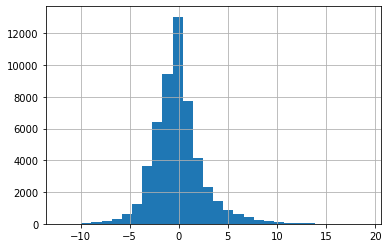

In [38]:
data['KLD Index'].hist(bins=30)

In [39]:
KLD_summary = data['KLD Index'].describe()
KLD_summary['median'] = data['KLD Index'].median()
KLD_summary

count     53168.000000
mean         -0.001486
std           2.479646
min         -12.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          19.000000
median        0.000000
Name: KLD Index, dtype: float64

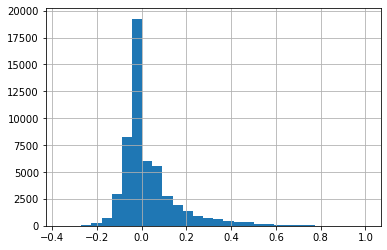

In [40]:
data['KLD Avg Index'].hist(bins=30)

In [41]:
KLD_avg_summary = data['KLD Avg Index'].describe()
KLD_avg_summary['median'] = data['KLD Avg Index'].median()
KLD_avg_summary

count     53097.000000
mean          0.032590
std           0.130392
min          -0.360000
25%          -0.028571
50%           0.000000
75%           0.063882
max           1.000000
median        0.000000
Name: KLD Avg Index, dtype: float64

### 4.3 Collect ESG level positive and negative performance indicator list
Column names contains "str" ("con") corresponding to positive (negative) performance indicators, respectively.

#### 4.3.1 Environment Performance Indicators:

In [42]:
E_pos = data.columns[data.columns.str.contains("env_str") & ~data.columns.str.contains("env_str_num")]
data['E_pos'] = data[E_pos].sum(axis=1)
data['E_pos_avg'] = data[E_pos].mean(axis=1)

In [43]:
E_neg = data.columns[data.columns.str.contains("env_con") & ~data.columns.str.contains("env_con_num")]
data['E_neg'] = data[E_neg].sum(axis=1)
data['E_neg_avg'] = data[E_neg].mean(axis=1)

In [44]:
data['E Index'] = data['E_pos'] - data['E_neg']
data['E Avg Index'] = data['E_pos_avg'] - data['E_neg_avg']

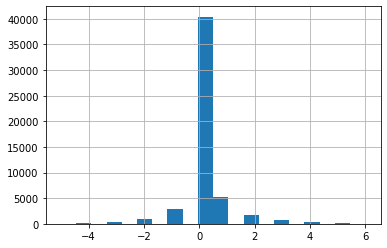

In [45]:
data['E Index'].hist(bins=20)

In [46]:
E_summary = data['E Index'].describe()
E_summary['median'] = data['E Index'].median()
E_summary

count     53168.000000
mean          0.124248
std           0.874777
min          -5.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
median        0.000000
Name: E Index, dtype: float64

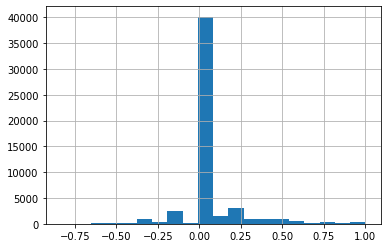

In [47]:
data['E Avg Index'].hist(bins=20)

In [48]:
E_avg_summary = data['E Avg Index'].describe()
E_avg_summary['median'] = data['E Avg Index'].median()
E_avg_summary

count     53059.000000
mean          0.039982
std           0.179513
min          -0.833333
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
median        0.000000
Name: E Avg Index, dtype: float64

#### 4.3.2 Social Performance Indicators:

In [49]:
S_pos = data.columns[data.columns.str.contains("com_str") & ~data.columns.str.contains("com_str_num") |
                     data.columns.str.contains("hum_str") & ~data.columns.str.contains("hum_str_num") |
                     data.columns.str.contains("emp_str") & ~data.columns.str.contains("emp_str_num") |
                     data.columns.str.contains("div_str") & ~data.columns.str.contains("div_str_num") |
                     data.columns.str.contains("pro_str") & ~data.columns.str.contains("pro_str_num")]
data['S_pos'] = data[S_pos].sum(axis=1)
data['S_pos_avg'] = data[S_pos].mean(axis=1)

In [50]:
S_neg = data.columns[data.columns.str.contains("com_con") & ~data.columns.str.contains("com_con_num") |
                     data.columns.str.contains("hum_con") & ~data.columns.str.contains("hum_con_num") |
                     data.columns.str.contains("emp_con") & ~data.columns.str.contains("emp_con_num") |
                     data.columns.str.contains("div_con") & ~data.columns.str.contains("div_con_num") |
                     data.columns.str.contains("pro_con") & ~data.columns.str.contains("pro_con_num")]
data['S_neg'] = data[S_neg].sum(axis=1)
data['S_neg_avg'] = data[S_neg].mean(axis=1)

In [51]:
data['S Index'] = data['S_pos'] - data['S_neg']
data['S Avg Index'] = data['S_pos_avg'] - data['S_neg_avg']

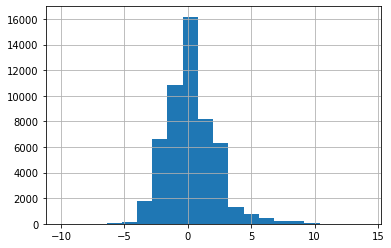

In [52]:
data['S Index'].hist(bins=20)

In [53]:
S_summary = data['S Index'].describe()
S_summary['median'] = data['S Index'].median()
S_summary

count     53168.000000
mean          0.148642
std           1.906924
min         -10.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max          14.000000
median        0.000000
Name: S Index, dtype: float64

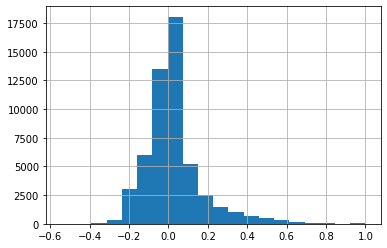

In [54]:
data['S Avg Index'].hist(bins=20)

In [55]:
S_avg_summary = data['S Avg Index'].describe()
S_avg_summary['median'] = data['S Avg Index'].median()
S_avg_summary

count     53072.000000
mean          0.021746
std           0.148890
min          -0.545455
25%          -0.055556
50%           0.000000
75%           0.057143
max           1.000000
median        0.000000
Name: S Avg Index, dtype: float64

#### 4.3.3 Governance Performance Indicators:

In [56]:
G_pos = data.columns[data.columns.str.contains("cgov_str") & ~data.columns.str.contains("cgov_str_num")]
data['G_pos'] = data[G_pos].sum(axis=1)
data['G_pos_avg'] = data[G_pos].mean(axis=1)

In [57]:
G_neg = data.columns[data.columns.str.contains("cgov_con") & ~data.columns.str.contains("cgov_con_num")]
data['G_neg'] = data[G_neg].sum(axis=1)
data['G_neg_avg'] = data[G_neg].mean(axis=1)

In [58]:
data['G Index'] = data['G_pos'] - data['G_neg']
data['G Avg Index'] = data['G_pos_avg'] - data['G_neg_avg']

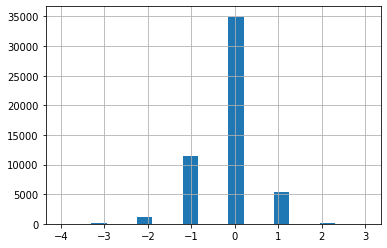

In [59]:
data['G Index'].hist(bins=20)

In [60]:
G_summary = data['G Index'].describe()
G_summary['median'] = data['G Index'].median()
G_summary

count     53168.000000
mean         -0.155563
std           0.635564
min          -4.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
median        0.000000
Name: G Index, dtype: float64

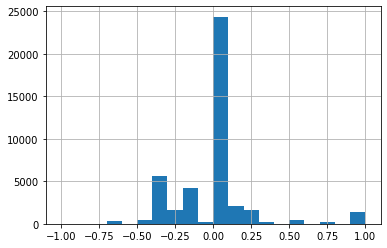

In [61]:
data['G Avg Index'].hist(bins=20)

In [62]:
G_avg_summary = data['G Avg Index'].describe()
G_avg_summary['median'] = data['G Avg Index'].median()
G_avg_summary

count     42813.000000
mean         -0.019085
std           0.260127
min          -1.000000
25%          -0.166667
50%           0.000000
75%           0.000000
max           1.000000
median        0.000000
Name: G Avg Index, dtype: float64

#### 4.3.4 Controversial Business Involvement Indicators:
<div class="alert alert-block alert-warning">
<b>Warning:</b> "fir" has no "fir_con_num" so do NOT use "_num" columns to calculate aggregates.
</div>

In [63]:
Controv = data.columns[data.columns.str.contains("alc") & ~data.columns.str.contains("alc_con_num") |
                       data.columns.str.contains("fir") & ~data.columns.str.contains("fir_con_num") |
                       data.columns.str.contains("gam") & ~data.columns.str.contains("gam_con_num") |
                       data.columns.str.contains("mil") & ~data.columns.str.contains("mil_con_num") |
                       data.columns.str.contains("nuc") & ~data.columns.str.contains("nuc_con_num") |
                       data.columns.str.contains("tob") & ~data.columns.str.contains("tob_con_num")]
data['Controv'] = data[Controv].sum(axis=1)
data['Controv_avg'] = data[Controv].mean(axis=1)
data['Controv Index'] = - data['Controv']
data['Controv Avg Index'] = - data['Controv_avg']

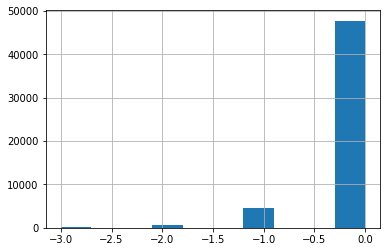

In [64]:
data['Controv Index'].hist(bins=None)

In [65]:
Controv_summary = data['Controv Index'].describe()
Controv_summary['median'] = data['Controv Index'].median()
Controv_summary

count     53168.000000
mean         -0.118812
std           0.377745
min          -3.000000
25%          -0.000000
50%          -0.000000
75%          -0.000000
max          -0.000000
median        0.000000
Name: Controv Index, dtype: float64

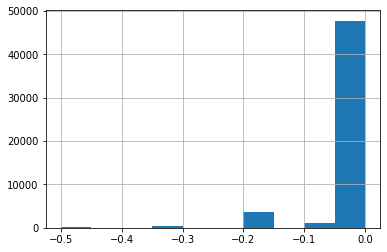

In [66]:
data['Controv Avg Index'].hist(bins=None)

In [67]:
Controv_avg_summary = data['Controv Avg Index'].describe()
Controv_avg_summary['median'] = data['Controv Avg Index'].median()
Controv_avg_summary

count     53168.000000
mean         -0.017403
std           0.057653
min          -0.500000
25%          -0.000000
50%          -0.000000
75%          -0.000000
max          -0.000000
median        0.000000
Name: Controv Avg Index, dtype: float64

### 4.4 Construct Aggregate KLD Index from ESG & Controversial granular level

In [68]:
data['ESG_pos'] = data['E_pos'] + data['S_pos'] + data['G_pos']
data['ESG_neg'] = data['E_neg'] + data['S_neg'] + data['G_neg'] + data['Controv']
data['ESG Pos-Neg Index'] = data['ESG_pos'] - data['ESG_neg']
data['ESG Agg Index'] = data['E Index'] + data['S Index'] + data['G Index'] + data['Controv Index']
data['ESG Agg Avg Index'] = data['E Avg Index'] + data['S Avg Index'] + data['G Avg Index'] + data['Controv Avg Index']

In [69]:
data['ESG Pos-Neg Index'].describe()

count    53168.000000
mean        -0.001486
std          2.479646
min        -12.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: ESG Pos-Neg Index, dtype: float64

In [70]:
data['ESG Agg Index'].describe()

count    53168.000000
mean        -0.001486
std          2.479646
min        -12.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: ESG Agg Index, dtype: float64

In [71]:
data['ESG Agg Avg Index'].describe()

count    42800.000000
mean        -0.015948
std          0.397781
min         -1.728408
25%         -0.209524
50%         -0.050000
75%          0.083333
max          2.694444
Name: ESG Agg Avg Index, dtype: float64

In [72]:
data['KLD Index'].describe()

count    53168.000000
mean        -0.001486
std          2.479646
min        -12.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: KLD Index, dtype: float64

In [73]:
data['KLD Avg Index'].describe()

count    53097.000000
mean         0.032590
std          0.130392
min         -0.360000
25%         -0.028571
50%          0.000000
75%          0.063882
max          1.000000
Name: KLD Avg Index, dtype: float64

#### 4.4.1 Check that the aggregate results are the same using different methods above:

In [74]:
sum(~(data['ESG Pos-Neg Index'] == data['ESG Agg Index']))

0

In [75]:
sum(~(data['KLD Index'] == data['ESG Agg Index']))

0

In [76]:
data['ESG Pos-Neg Index'].describe() == data['ESG Agg Index'].describe()

count    True
mean     True
std      True
min      True
25%      True
50%      True
75%      True
max      True
dtype: bool

In [77]:
data['KLD Index'].describe() == data['ESG Agg Index'].describe()

count    True
mean     True
std      True
min      True
25%      True
50%      True
75%      True
max      True
dtype: bool

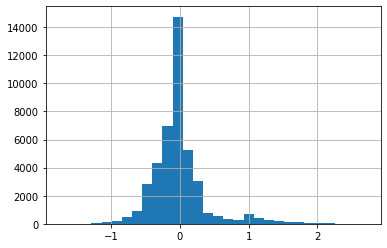

In [78]:
data['ESG Agg Avg Index'].hist(bins=30)

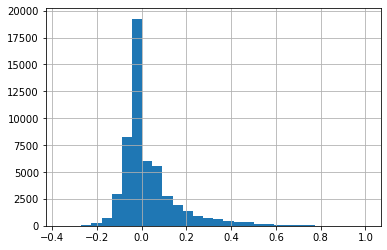

In [79]:
data['KLD Avg Index'].hist(bins=30)

#### 4.4.2 Check that the positive and negative indicator lists are the same using different methods above:

In [98]:
set(positive) == set(E_pos.append(S_pos).append(G_pos))

True

In [95]:
set(negative) == set(E_neg.append(S_neg).append(G_neg).append(Controv))

True

# Save the dataset

In [80]:
data.to_csv('kld.csv', header=False)